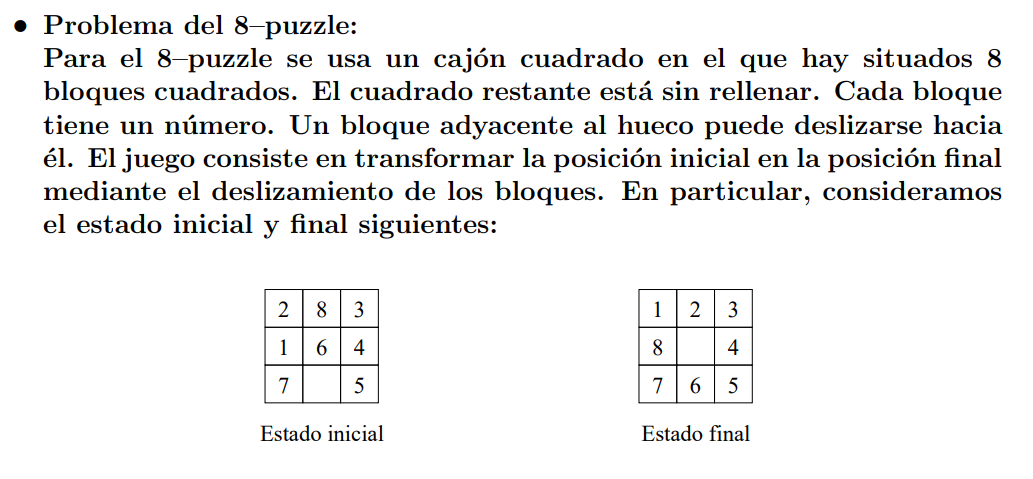

In [ ]:
#Para el manejo de vectores y listas utilizamos la biblioteca numpy
import numpy as np

In [ ]:
#Visualizar el estado en el 8-puzzle
def visualizar(estado):
  print(estado[0:3])
  print(estado[3:6])
  print(estado[6:9])

In [ ]:
#Acumula el valor de la heuristica H1 - Suma total de las fichas descolocadas
def heuristica1(estado,estado_objetivo):
  cont=0
  diferencia=[e1 - e2 for e1, e2 in zip(estado,estado_objetivo)]
  for i in range(len(diferencia)):
    if diferencia[i]!=0:
      cont+=1
  return cont

In [ ]:
def heuristica2(estado,estado_objetivo):
  cont=0
  diferencia=[abs(e1 - e2) for e1, e2 in zip(estado,estado_objetivo)]
  return sum(diferencia)

In [ ]:
#Obtienes el estado despues del movimiento
def mover(estado,movimiento):
  estado=np.array(estado).reshape((3,3))
  fila, columna = np.where(estado == 0)
  nueva_fila = fila + movimiento[0]
  nueva_columna = columna + movimiento[1]

  if 0 <= nueva_fila < 3 and 0 <= nueva_columna < 3:
    nuevo_estado = estado.copy()
    nuevo_estado[fila, columna], nuevo_estado[nueva_fila, nueva_columna] = nuevo_estado[nueva_fila, nueva_columna], nuevo_estado[fila, columna]
    return nuevo_estado.flatten()

In [ ]:
#Nodo, agrupado todo
class Nodo:
    def __init__(self, estado, padre, movimiento, costo, profundidad):
        self.estado = estado
        self.padre = padre
        self.movimiento = movimiento
        self.costo = costo
        self.profundidad = profundidad

In [ ]:
# Establecemos el estado inicial y estado objetivo
#estado_inicial = [2,8,3,1,6,4,7,0,5]
estado_inicial =  [1,3,0,6,2,4,8,7,5]
#estado_inicial = [6,3,1,8,0,4,7,5,2] #desborda con la heuristica H1
estado_objetivo = [1,2,3,8,0,4,7,6,5]


In [ ]:
#Establecemos el Nodo Raíz Inicial
raiz= Nodo(estado_inicial,None,None,0,0)
frontera=[raiz, ] #Aquí se establece la frontera
explorados=[] #Aquí se guardan los explorados para no repetirlos
camino=[] #Aquí se establece el camino conforme a la búsqueda A*

In [ ]:
#Guardamos el nodo raíz
explorados.append(frontera[0].estado)

In [ ]:
#se definen los movimientos en x y y
#x=0,y=1 derecha
#x=0,y=-1 izquierda
#x=1,y=0 abajo
#x=-1,y=0 arriba
movimientos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
dicc={(0,1):"derecha",(0,-1):"izquieda",(1,0):"abajo",(-1,0):"arriba"}

In [ ]:
nodo_actual=estado_inicial
cuenta=0
evaluar=[]
movimientosh=[]
solucion=[estado_inicial, ]
movimientosf=[]
paro=100

while paro>0:
  for movimiento in movimientos:
    nuevo_estado=mover(nodo_actual,movimiento)
    if nuevo_estado is None:
      continue
    nuevo_estado1=nuevo_estado.tolist()
    if nuevo_estado1 not in explorados:
       cuenta+=1
       explorados.append(nuevo_estado1)
       evaluar.append(nuevo_estado1)
       movimientosh.append(movimiento)
    #cuenta+=1
    #explorados.append(nuevo_estado1)
    #evaluar.append(nuevo_estado1)
    #movimientosh.append(movimiento)
  heur=[]
  tamano=len(evaluar)
  for dato in range(tamano):
    matrizeval=evaluar[dato]
    calculo=heuristica2(matrizeval,estado_objetivo)
    #print(calculo)
    heur.append(calculo)
  if bool(heur) is False:
    print("No hay camino de solución")
    paro=0
    continue
  pos=heur.index(min(heur))
  camino.append(movimientosh[pos])
  nodo_actual=evaluar[pos]
  solucion.append(evaluar[pos])
  movimientosf.append(dicc[movimientosh[pos]])
  evaluar=[]
  movimientosh=[]
  paro=min(heur)
  #print("Distancia heurística:",paro)

8
12
8
4
12
16
16
14
12
12
12
8
14
20
20
16
14
12
12
8
20
20
18
20
16
16
4
8
20
8
10
6
4
4
0


In [ ]:
def muestra_solucion(estado_inicial,estado_objetivo,solucion,movimientosf):
  print("Estado Inicial")
  visualizar(estado_inicial)
  print("\nEstado Objetivo")
  visualizar(estado_objetivo)
  contador=0;
  tamano=len(movimientosf)
  print("\nSecuencia de",tamano,"Pasos para solucionar el 8-Puzzle")
  for movimiento in movimientosf:
    msg = "\nMovimiento: {0}"
    print(msg.format(movimientosf[contador]))
    visualizar(solucion[contador+1])
    contador+=1

In [ ]:
muestra_solucion(estado_inicial,estado_objetivo,solucion,movimientosf)

Estado Inicial
[1, 3, 0]
[6, 2, 4]
[8, 7, 5]

Estado Objetivo
[1, 2, 3]
[8, 0, 4]
[7, 6, 5]

Secuencia de 18 Pasos para solucionar el 8-Puzzle

Movimiento: izquieda
[1, 0, 3]
[6, 2, 4]
[8, 7, 5]

Movimiento: abajo
[1, 2, 3]
[6, 0, 4]
[8, 7, 5]

Movimiento: derecha
[1, 2, 3]
[6, 4, 0]
[8, 7, 5]

Movimiento: arriba
[1, 2, 0]
[6, 4, 3]
[8, 7, 5]

Movimiento: izquieda
[1, 0, 2]
[6, 4, 3]
[8, 7, 5]

Movimiento: abajo
[1, 4, 2]
[6, 0, 3]
[8, 7, 5]

Movimiento: derecha
[1, 4, 2]
[6, 3, 0]
[8, 7, 5]

Movimiento: arriba
[1, 4, 0]
[6, 3, 2]
[8, 7, 5]

Movimiento: izquieda
[1, 0, 4]
[6, 3, 2]
[8, 7, 5]

Movimiento: abajo
[1, 3, 4]
[6, 0, 2]
[8, 7, 5]

Movimiento: izquieda
[1, 3, 4]
[0, 6, 2]
[8, 7, 5]

Movimiento: abajo
[1, 3, 4]
[8, 6, 2]
[0, 7, 5]

Movimiento: derecha
[1, 3, 4]
[8, 6, 2]
[7, 0, 5]

Movimiento: arriba
[1, 3, 4]
[8, 0, 2]
[7, 6, 5]

Movimiento: derecha
[1, 3, 4]
[8, 2, 0]
[7, 6, 5]

Movimiento: arriba
[1, 3, 0]
[8, 2, 4]
[7, 6, 5]

Movimiento: izquieda
[1, 0, 3]
[8, 2, 4]
[7, 6, 